## NervePool examples
#### September 2022
#### Sarah McGuire

In [1]:
import networkx

In [2]:
import numpy as np

# complex.py defines a simplicial complex class and functions for pooling
import complex

### Example 1: simplicial complex defined using list of simplices

In [3]:
# Specify lists of simplices which define a simplicial complex
vertex_list = ['a','b','c','d','e','f','g','h','i','j','k','l']
edge_list = ['ab','ac','bc','cd','cj','de','df','dg','ef','gh','gi','gj','gk','gl','hi','jk','jl','kl']
triangle_list = ['abc','gjk','gjl','gkl','jkl']
tetrahedron_list = ['gjkl']

# Gather these lists into a single list
simplices = list([vertex_list,edge_list, triangle_list, tetrahedron_list])

In [4]:
# Use list of simplices to define a simplicial complex, and draw it
from plotting import drawComplex


SC1 = complex.SComplex(simplices)

SC1.B1
# drawComplex(SC1)

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1.],
       [0., 0., 0., 0

The simplicial complex class `SComplex` has attributes:
- simplices: dictionary of all simplices that define the complex, with dimension keys
- nodes: list of 0-dim simplices
- edges: list of 1-dim simplices
- cycles: list of 2-dim simplices
- tetra: list of 3-dim simplices
- boundaries: dictionary of all boundary matrices that define the complex, with dimension keys
- B1: numpy array 1-dim boundary matrix
- B2: numpy array 2-dim boundary matrix
- B3: numpy array 3-dim boundary matrix
- A0: numpy array 0-simplex upper adjacency matrix
- A1: numpy array 1-simplex upper adjacency matrix
- A2: numpy array 2-simplex upper adjacency matrix
- A3: numpy array 3-simplex upper adjacency matrix
- dim: maximum dimension of the simplicial complex

And auxillary functions for visualization:
- `drawComplex()`: function to visualize the complex, optionally include argument S0 to draw the vertex cover
- `visualizeA()`: function to visualize the adjacency matrices of the complex,
- `visualizeB()`: function to visualize the boundary matrices of the complex,

Visualizing ADJACENCY MATRICES...


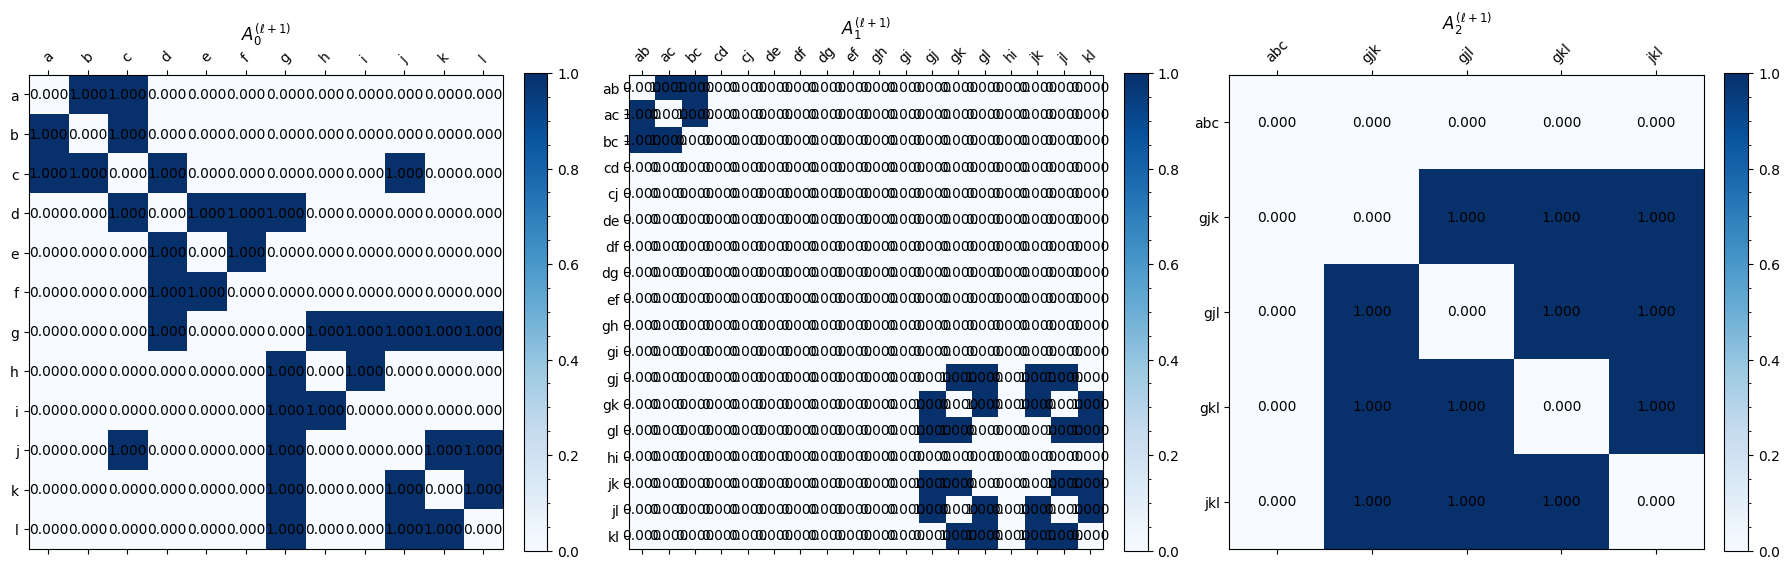

In [5]:
from plotting import visualizeA


visualizeA(SC1)

Visualizing BOUNDARY MATRICES...


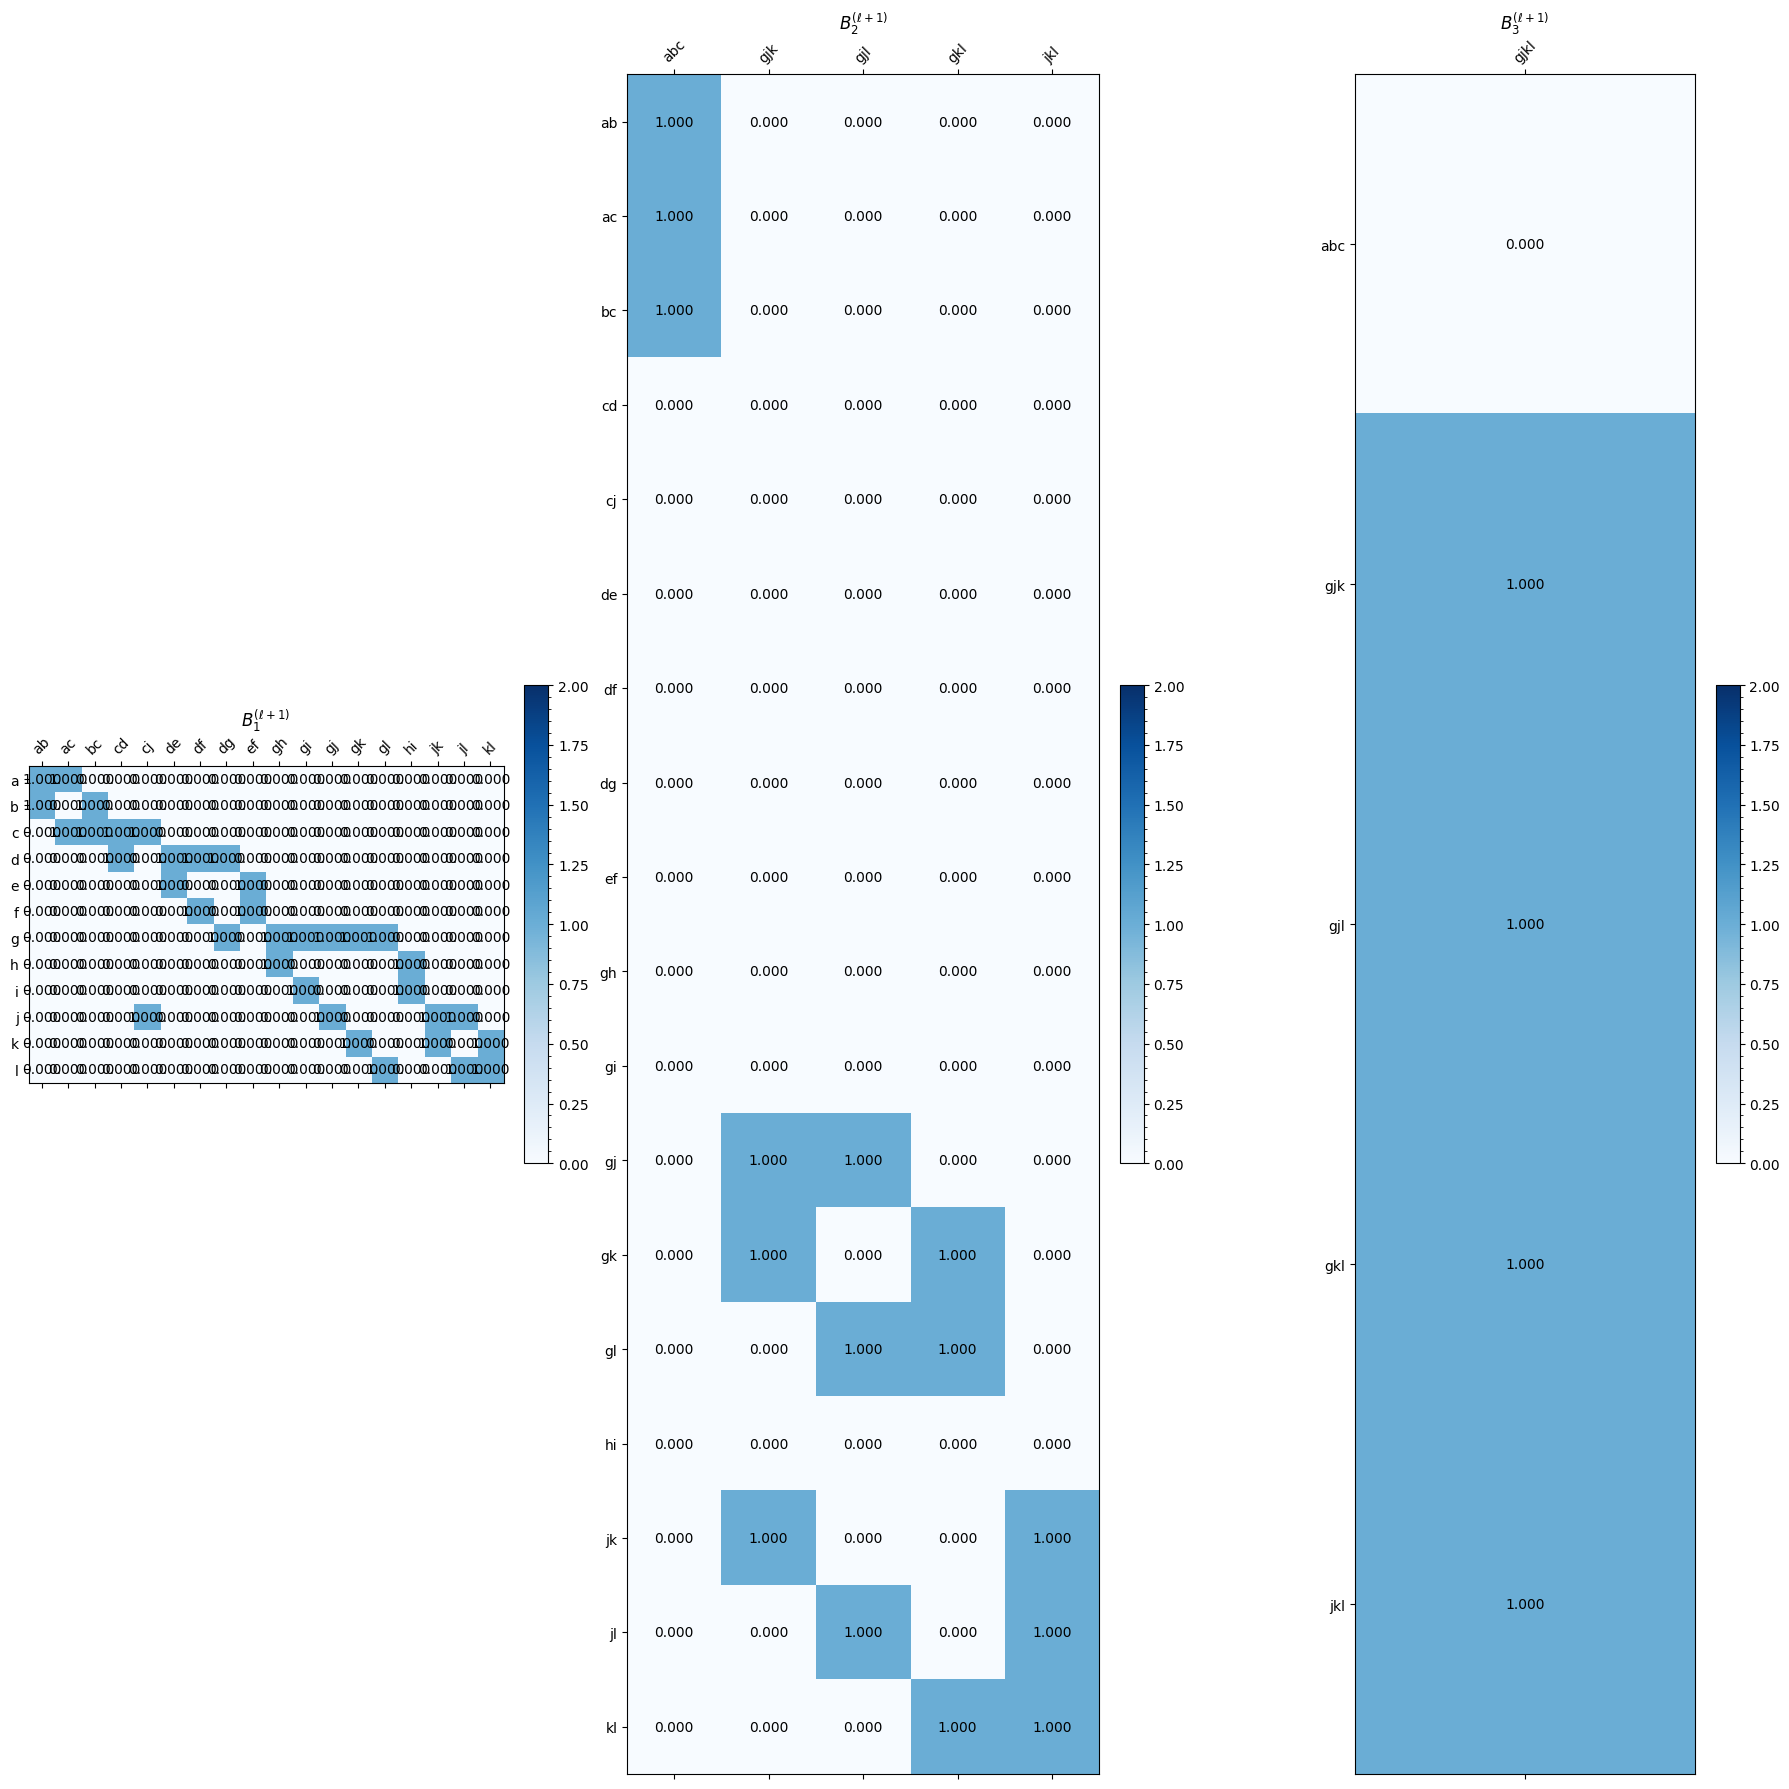

In [6]:
from plotting import visualizeB


visualizeB(SC1)

#### Specify a vertex cover (as a numpy array of cluster membership)

Drawing simplicial complex...
Vertex partition: {0: ['a', 'b', 'c', 'j'], 1: ['d', 'e', 'f'], 2: ['g', 'h', 'i'], 3: ['k', 'l']}


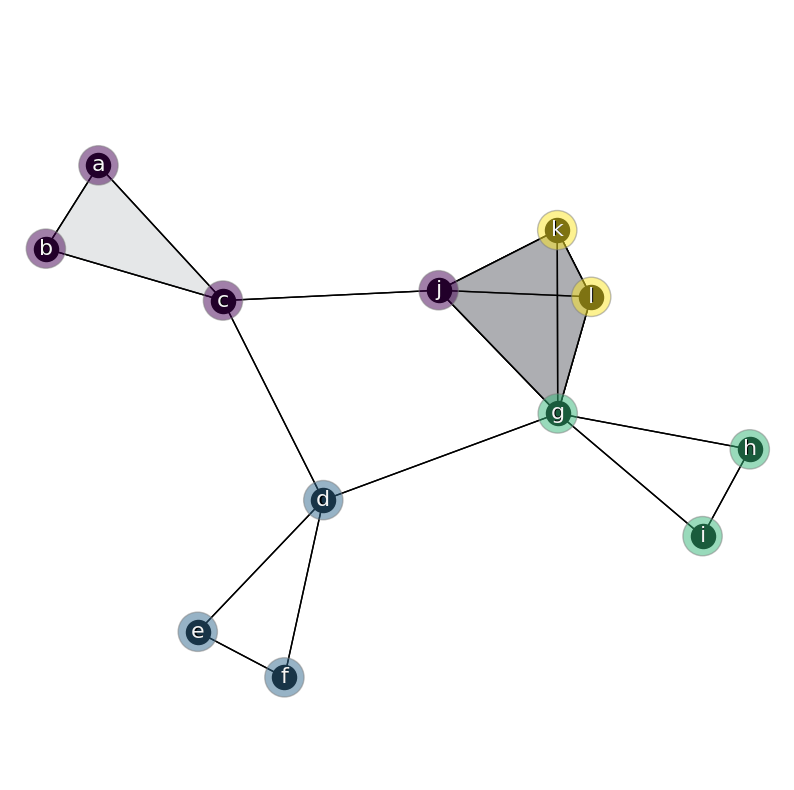

In [7]:
S0 = np.array([[1,0,0,0],[1,0,0,0],[1,0,0,0],[0,1,0,0],[0,1,0,0],[0,1,0,0],[0,0,1,0],[0,0,1,0],[0,0,1,0],[1,0,0,0],[0,0,0,1],[0,0,0,1]]) # v x v'

drawComplex(SC1, S0)


(4, 5)
[[0.33333333 0.33333333 0.66666667 0.         0.        ]
 [0.33333333 0.         0.         0.33333333 0.        ]
 [0.         0.33333333 0.         0.33333333 0.66666667]
 [0.         0.         0.66666667 0.         0.66666667]]
(5, 1)
[[0.       ]
 [0.0952381]
 [0.0952381]
 [0.       ]
 [0.0952381]]
(array([[0.33333333, 0.33333333, 0.66666667, 0.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 0.66666667, 0.        , 0.66666667]]), array([[0.       ],
       [0.0952381],
       [0.0952381],
       [0.       ],
       [0.0952381]]))
Drawing simplicial complex...


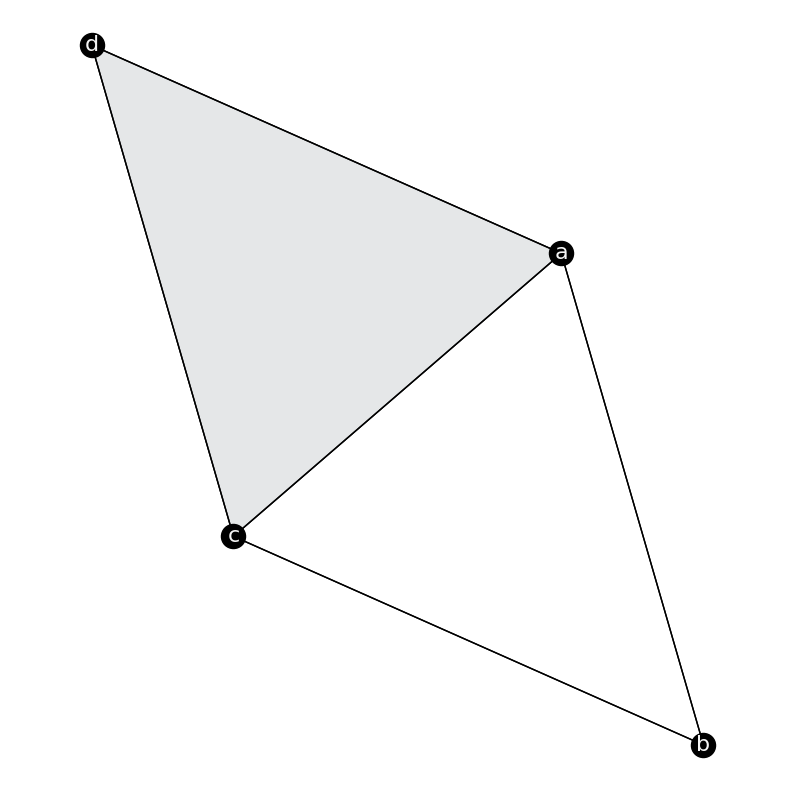

In [8]:
# Use the vertex cluster matrix S0 to pool the complex SC1
SC1_pooled = complex.pool_complex(SC1, S0)

# Draw the pooled complex
drawComplex(SC1_pooled)

The pooled simplicial complex has the following boundary matrices and corresponding adjacency matrices

Visualizing BOUNDARY MATRICES...


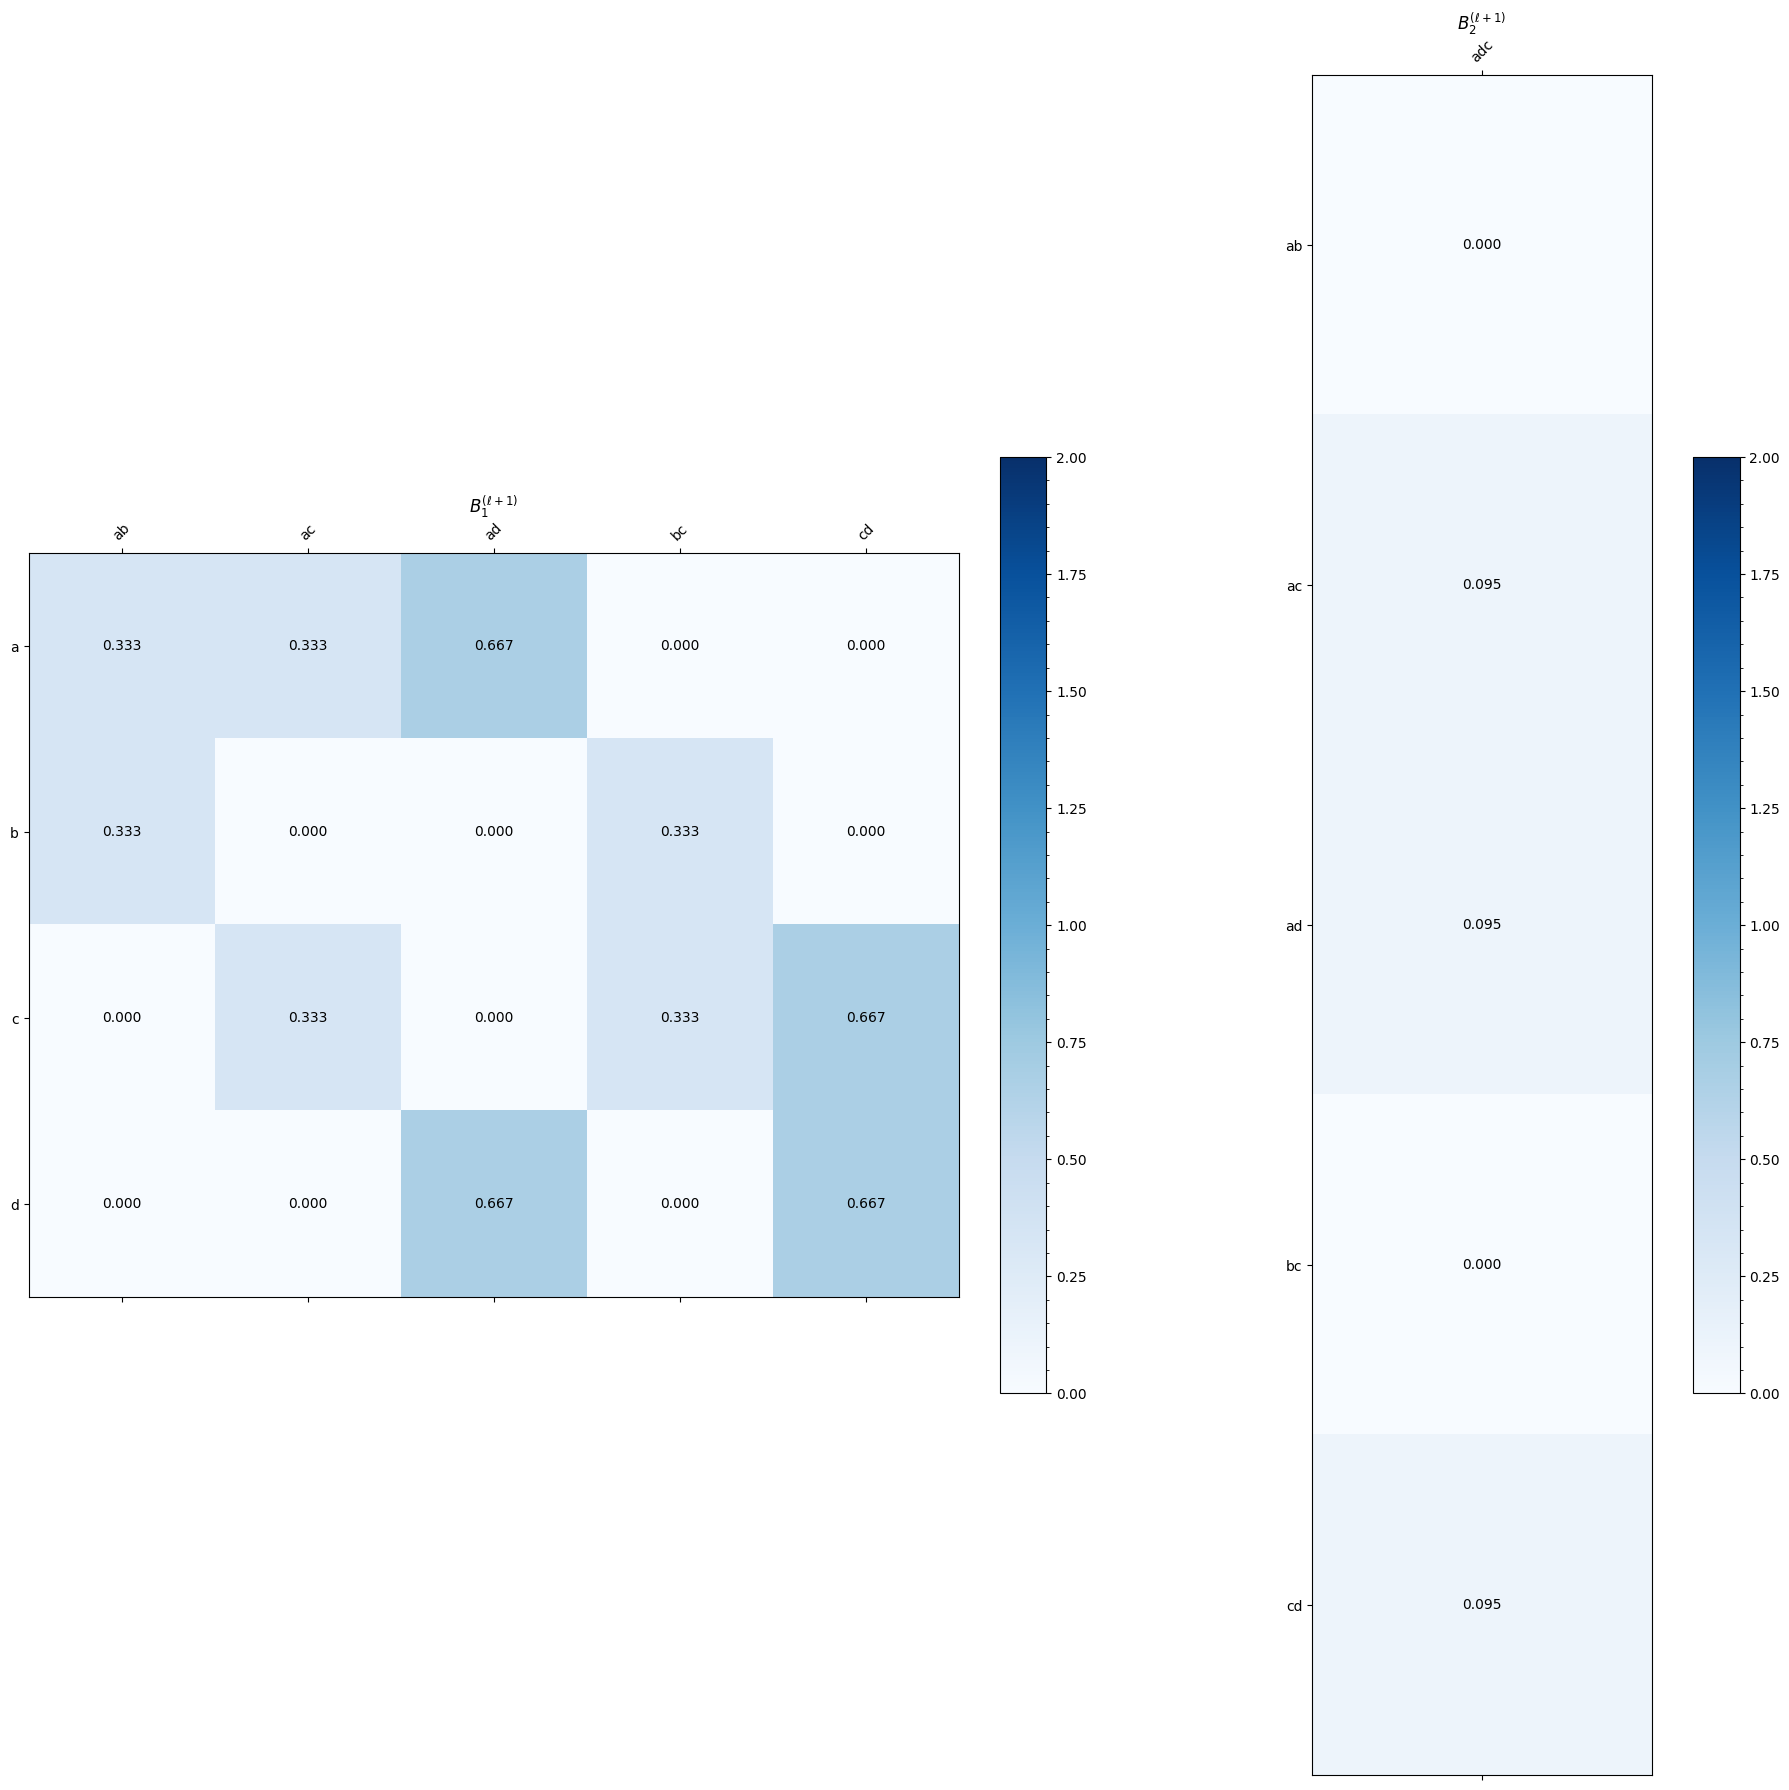

In [9]:
visualizeB(SC1_pooled)

Visualizing ADJACENCY MATRICES...


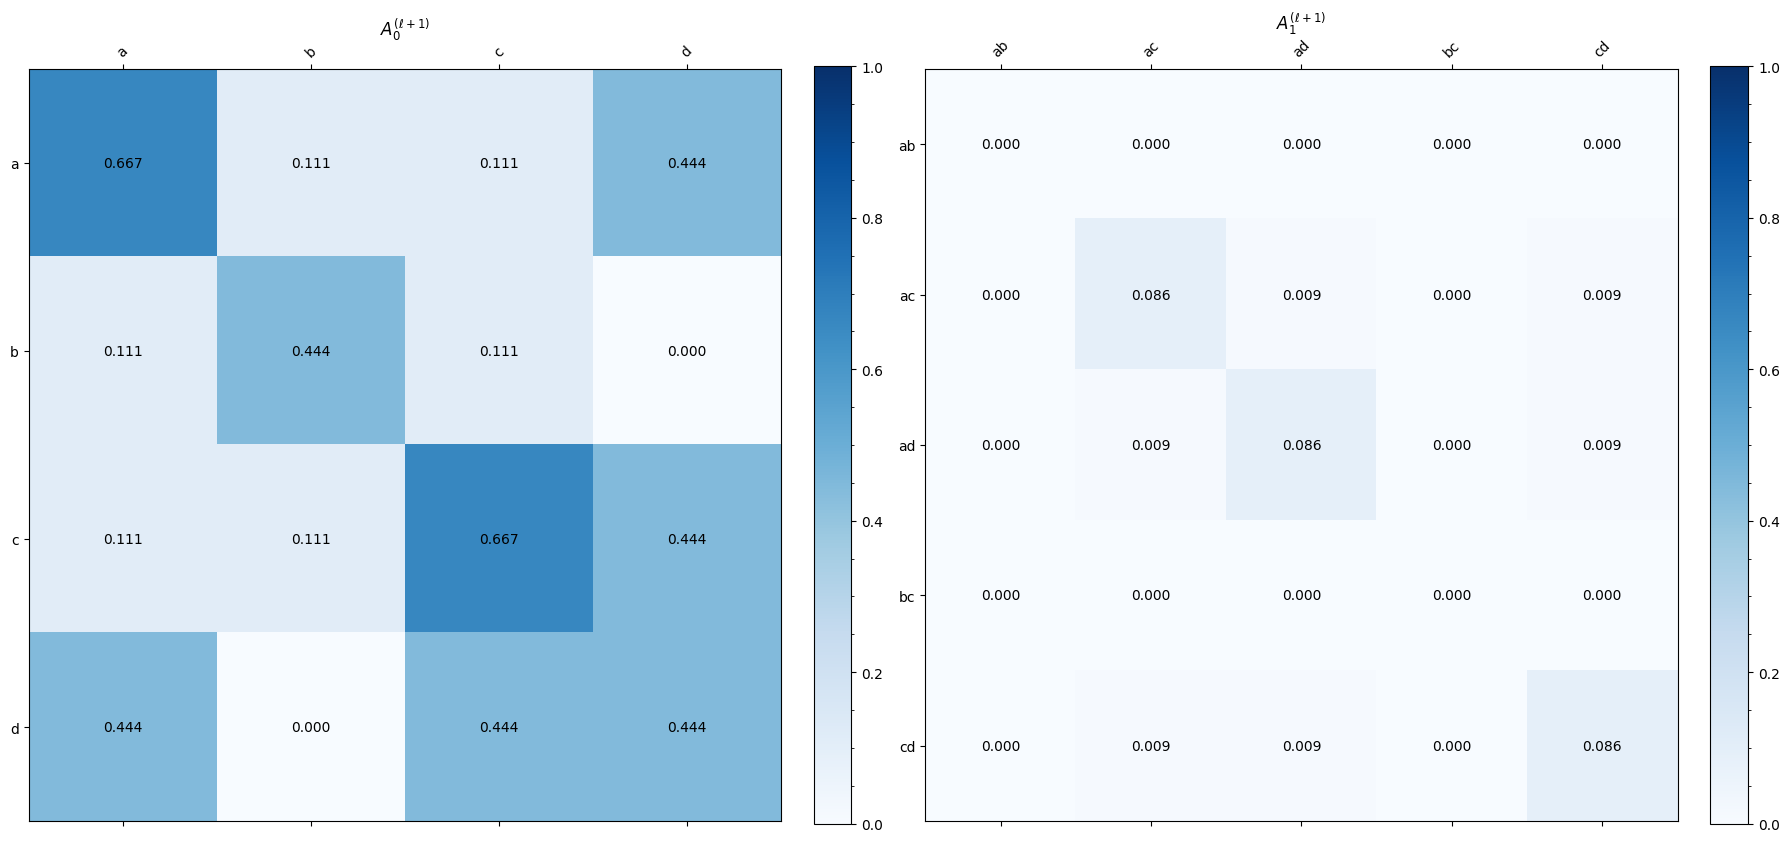

In [10]:
visualizeA(SC1_pooled)

### Example 2- "Identity" NervePool
#### For the same input simplicial complex, now consider a different choice of initial vertex. Let each vertex have its own distinct cluster i.e. $S_0$ is a permutation of the identity matrix.

Specify a vertex cover (as a numpy array of cluster membership). Choose $S_0$ to be a randomly permuted identity matrix

Drawing simplicial complex...
Vertex partition: {2: ['a'], 3: ['b'], 7: ['c'], 1: ['d'], 0: ['e'], 5: ['f'], 6: ['g'], 8: ['h'], 4: ['i'], 10: ['j'], 9: ['k'], 11: ['l']}


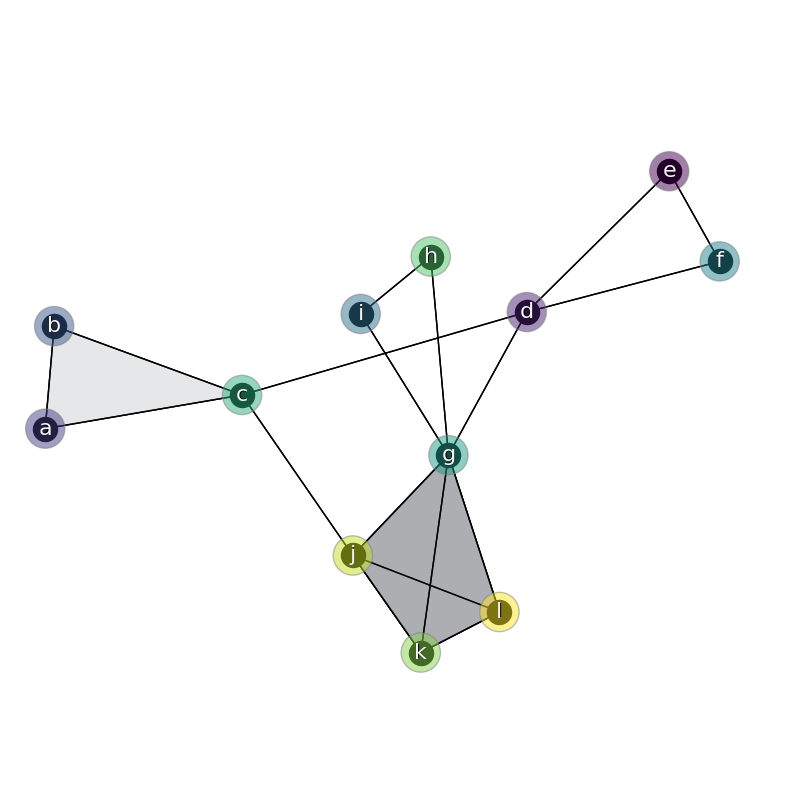

In [11]:
S0 = np.eye(len(vertex_list))
np.random.shuffle(S0)  # shuffle rows
# Visualize the complex, with clusters highlighted in different colors
drawComplex(SC1,S0)

Then, use the $S_0 = P*I_p$ to pool the simplicial complex, and note that the resulting simplicial complex has the same structure as the original. 

(12, 18)
[[0.33333333 0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  0.33333333 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  0.         0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.33333333 0.3333

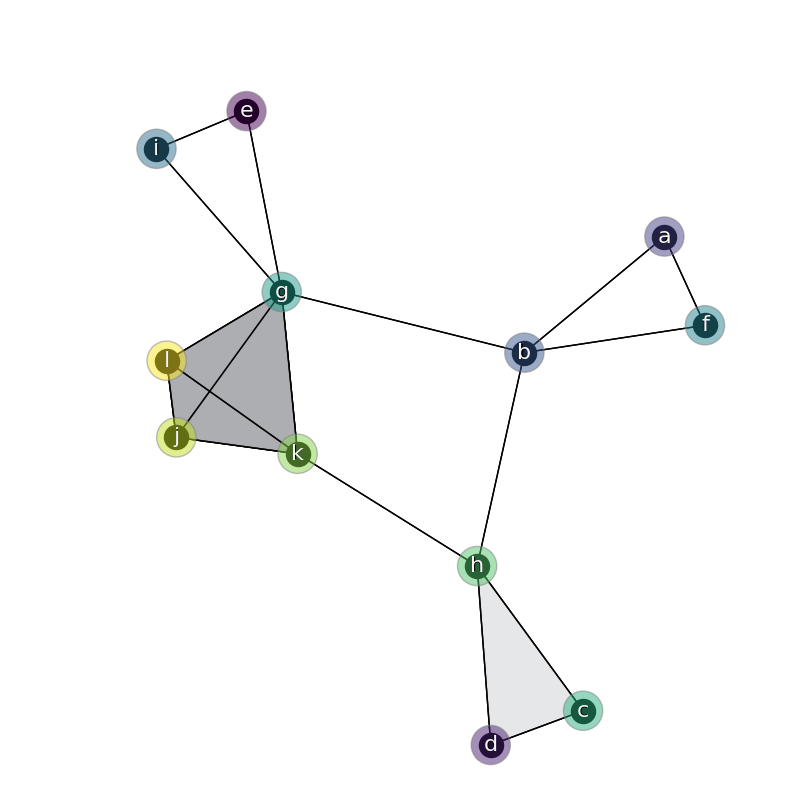

In [12]:
# Use the vertex cluster matrix S0 to pool the complex, and draw the pooled complex again
SC1_pooled = complex.pool_complex(SC1, S0)
drawComplex(SC1_pooled,S0)

### Example 2: Using a soft-partition on the vertex set

Drawing simplicial complex...


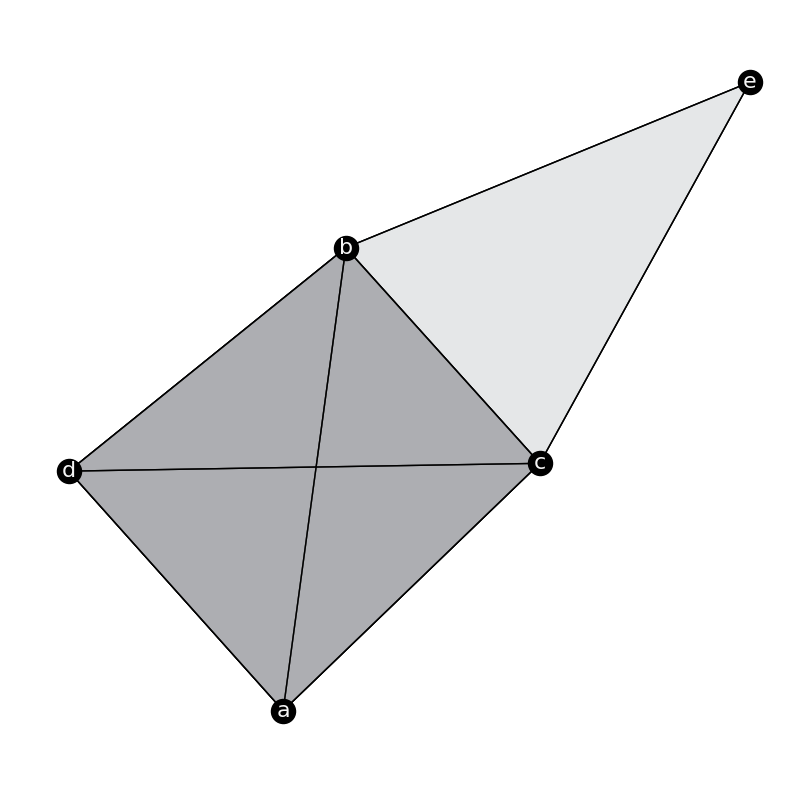

In [13]:
nodes = ['a','b','c','d','e']
edges = ['ab','ac','ad','bc','be','cd','ce', 'bd']
cycles = ['bce','abd', 'bcd','abc','acd']
tetra = ['abcd']
simplices = list([nodes, edges, cycles, tetra]) 
SC2 = complex.SComplex(simplices)
drawComplex(SC2)

In [14]:
SC2.simplices

{0: ['a', 'b', 'c', 'd', 'e'],
 1: ['ab', 'ac', 'ad', 'bc', 'be', 'cd', 'ce', 'bd'],
 2: ['bce', 'abd', 'bcd', 'abc', 'acd'],
 3: ['abcd']}

In [15]:
# Vertex cluster assignments
S0 = np.array([[1,0,0,1],[0,1,0,0],[0,1,1,1],[0,0,1,1],[0,1,0,0]])

(4, 6)
[[0.26666667 0.26666667 0.43333333 0.1        0.26666667 0.26666667]
 [0.26666667 0.1        0.26666667 1.1        1.26666667 1.1       ]
 [0.1        0.26666667 0.26666667 0.93333333 0.93333333 1.1       ]
 [0.36666667 0.53333333 0.7        1.03333333 1.2        1.36666667]]
(6, 4)
[[0.03809524 0.03809524 0.03809524 0.03809524]
 [0.03809524 0.03809524 0.03809524 0.03809524]
 [0.06190476 0.06190476 0.06190476 0.06190476]
 [0.05       0.05       0.05       0.16904762]
 [0.07380952 0.07380952 0.07380952 0.19285714]
 [0.07380952 0.07380952 0.07380952 0.19285714]]
(4, 1)
[[0.01428571]
 [0.01428571]
 [0.01428571]
 [0.02380952]]
(array([[0.26666667, 0.26666667, 0.43333333, 0.1       , 0.26666667,
        0.26666667],
       [0.26666667, 0.1       , 0.26666667, 1.1       , 1.26666667,
        1.1       ],
       [0.1       , 0.26666667, 0.26666667, 0.93333333, 0.93333333,
        1.1       ],
       [0.36666667, 0.53333333, 0.7       , 1.03333333, 1.2       ,
        1.36666667]]), arr

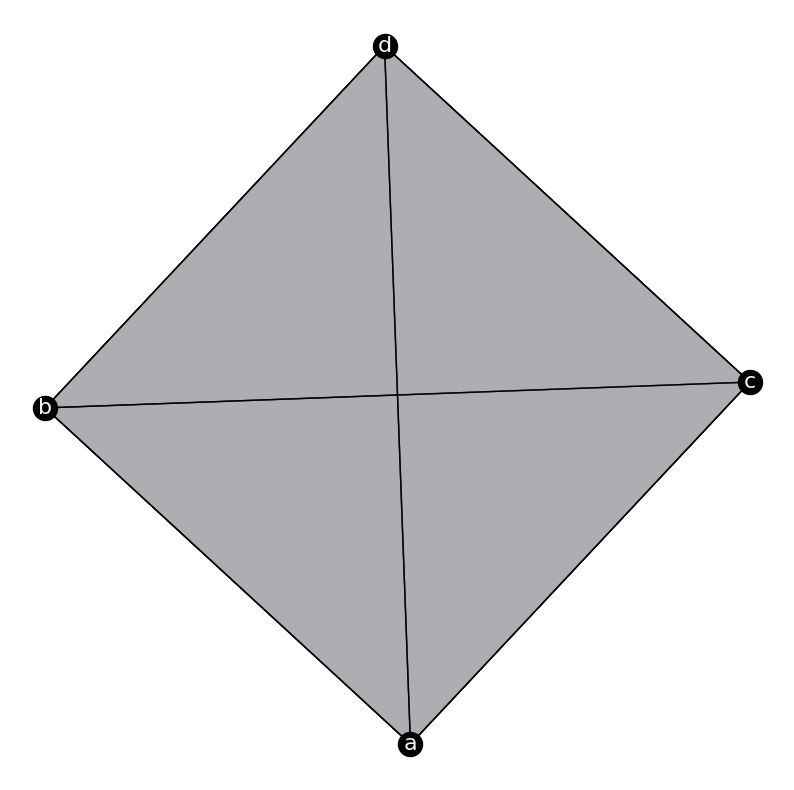

In [16]:
newSC2 = complex.pool_complex(SC2, S0)
drawComplex(newSC2)

### Example 3


Drawing simplicial complex...
Vertex partition: {0: ['a'], 1: ['b', 'e'], 2: ['c', 'd'], 3: ['f']}


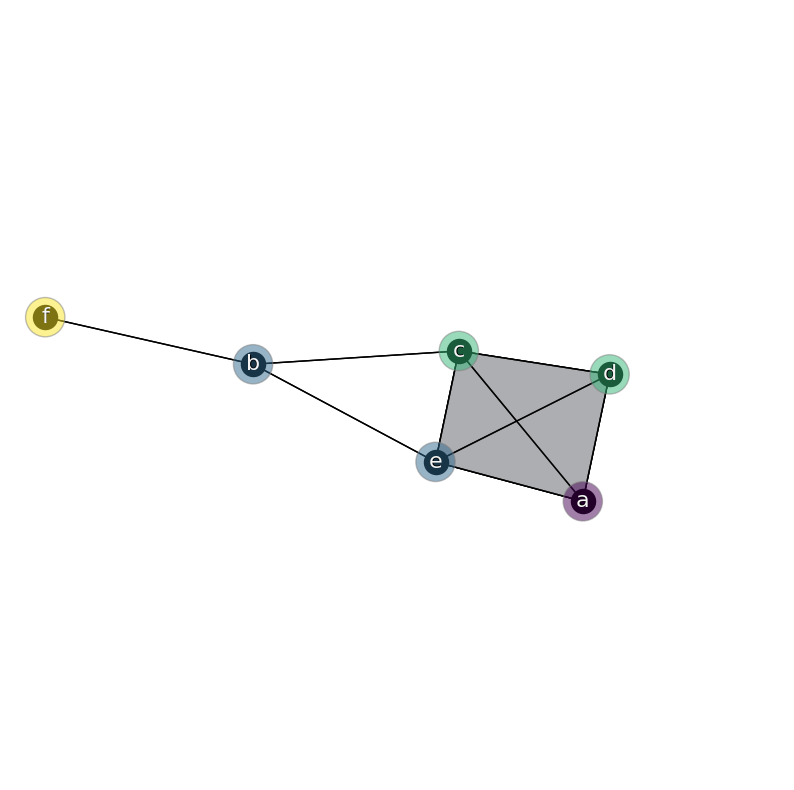

In [17]:
S0 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]) # v x v'
# lists of simplices
nodes = ['a','b','c','d','e','f']
edges = ['ae','ad','ac','bc','be','cd','ce','de','bf']
cycles = ['acd','ace','ade','cde']
tetra = ['acde']
simplices = list([nodes, edges, cycles, tetra])
SC3 = complex.SComplex(simplices)
drawComplex(SC3,S0)

In [18]:
newSC3 = complex.pool_complex(SC3, S0)

(4, 4)
[[0.33333333 0.66666667 0.         0.        ]
 [0.33333333 0.         1.         0.33333333]
 [0.         0.66666667 1.         0.        ]
 [0.         0.         0.         0.33333333]]
(4, 1)
[[0.0952381]
 [0.0952381]
 [0.0952381]
 [0.       ]]
(array([[0.33333333, 0.66666667, 0.        , 0.        ],
       [0.33333333, 0.        , 1.        , 0.33333333],
       [0.        , 0.66666667, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333]]), array([[0.0952381],
       [0.0952381],
       [0.0952381],
       [0.       ]]))


Drawing simplicial complex...


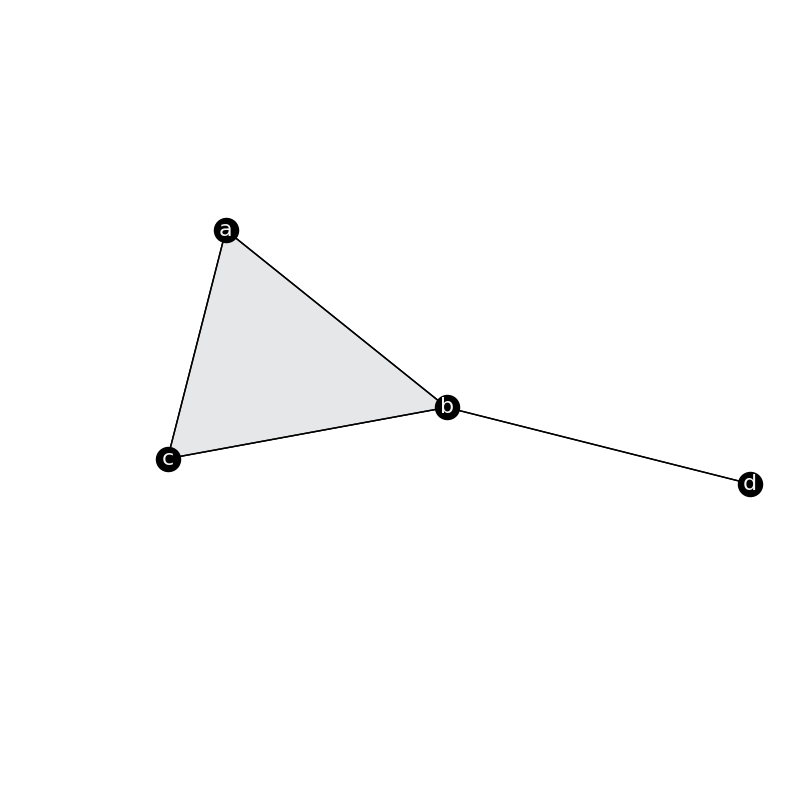

In [19]:
drawComplex(newSC3)

Visualizing BOUNDARY MATRICES...


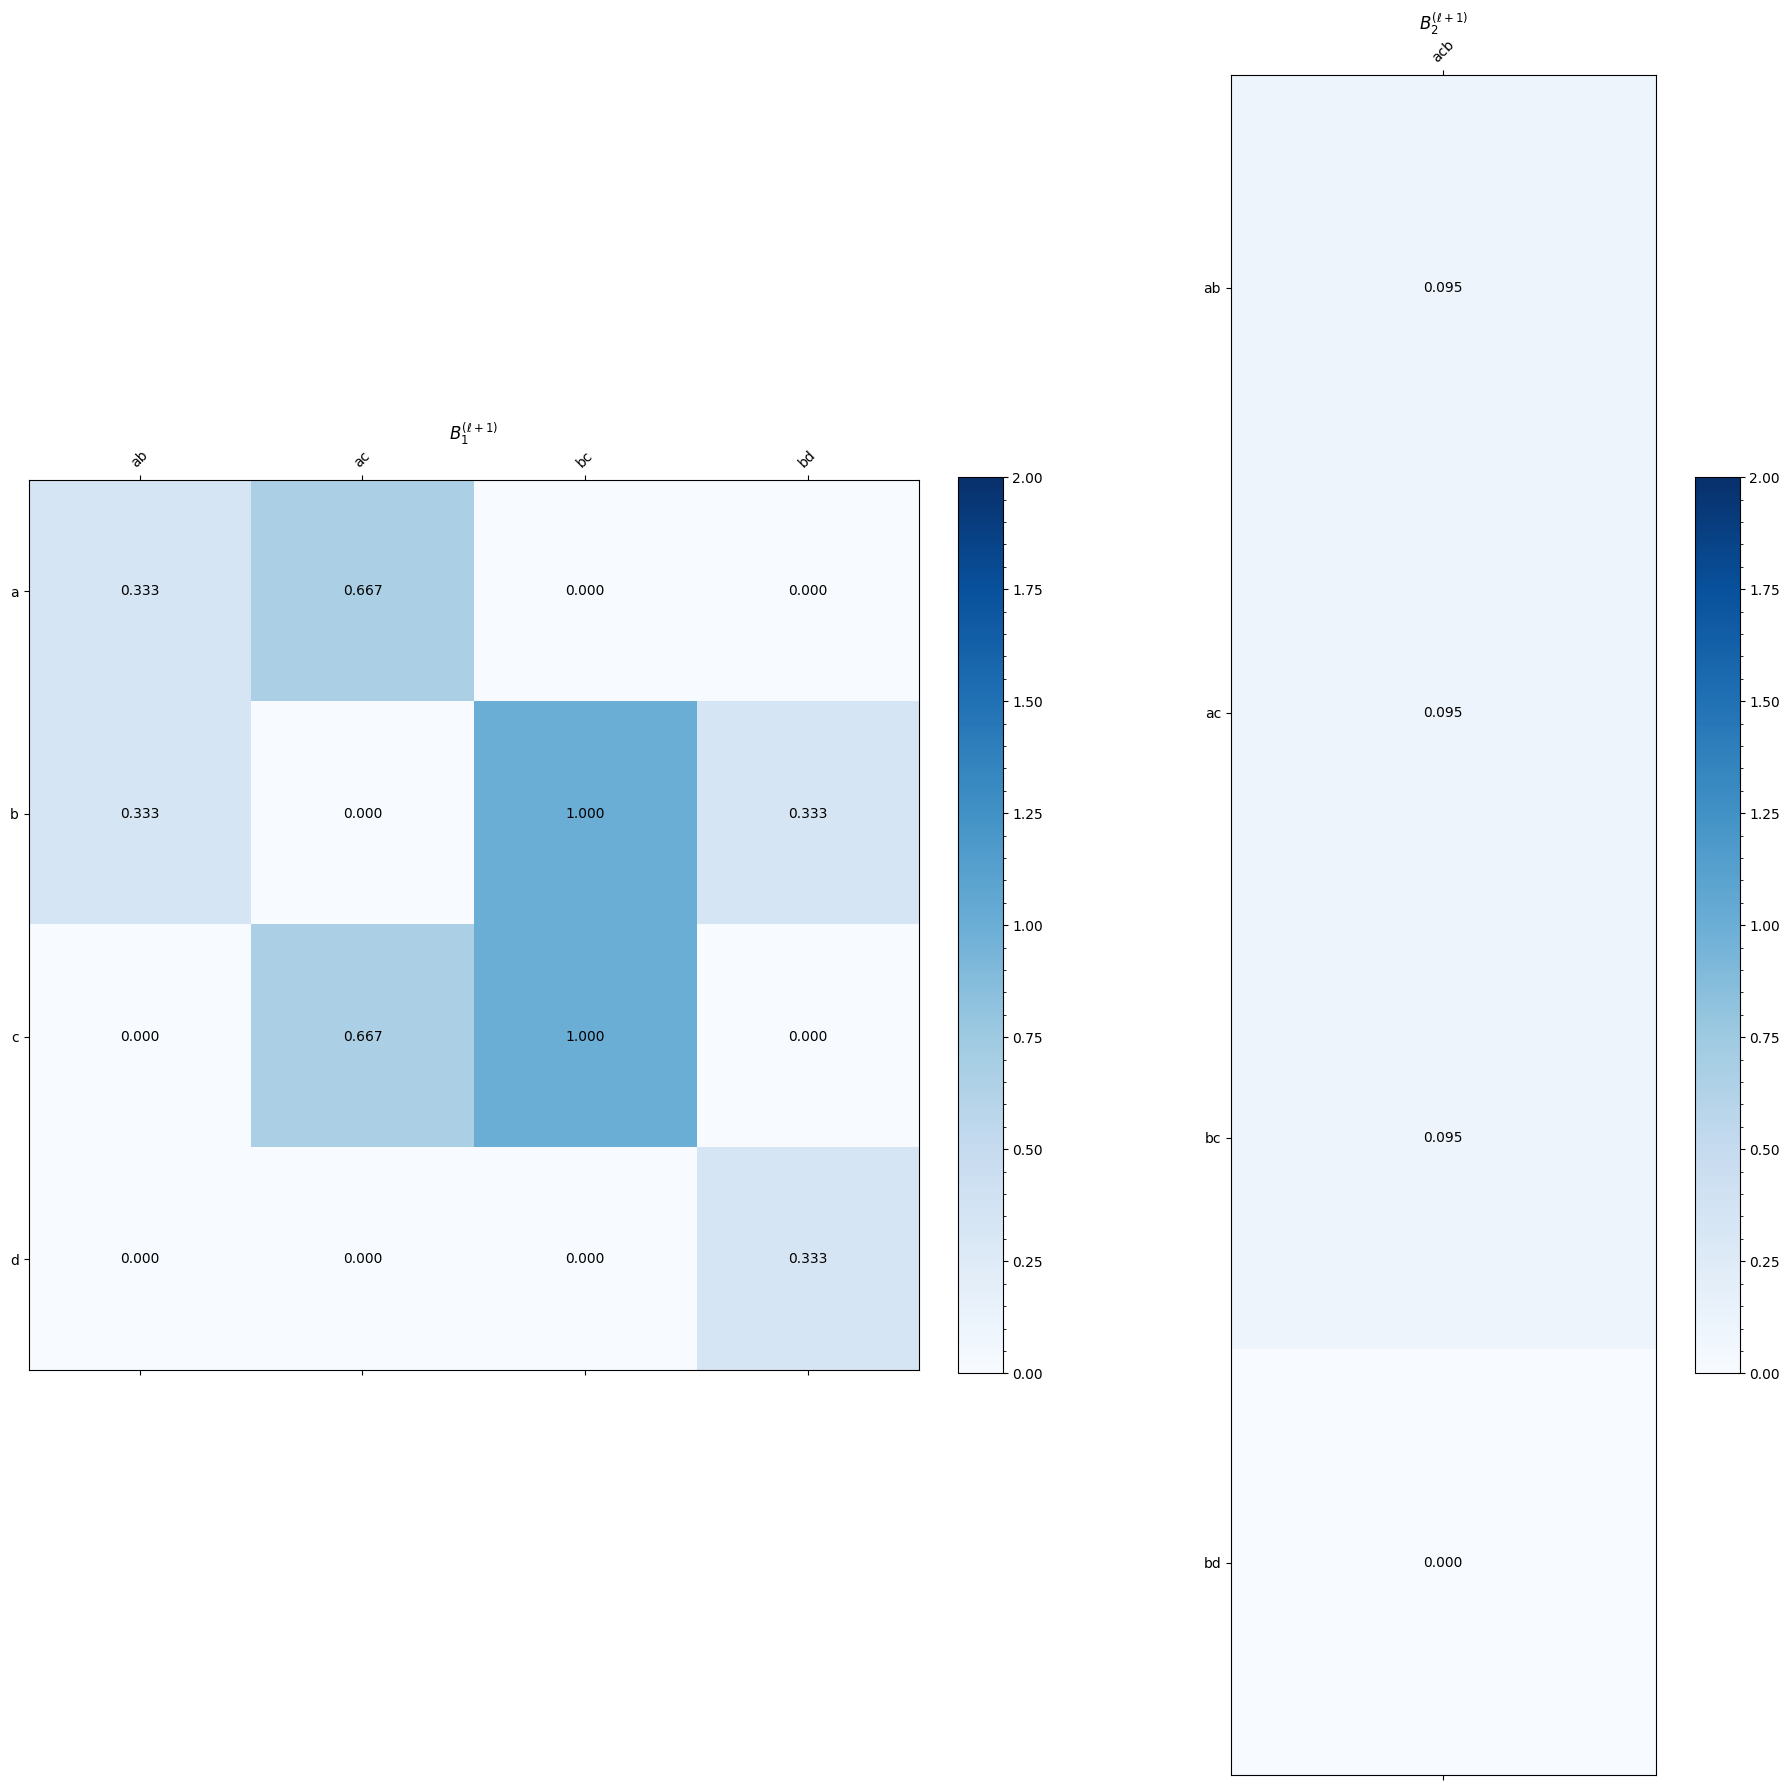

In [20]:
visualizeB(newSC3)

Visualizing ADJACENCY MATRICES...


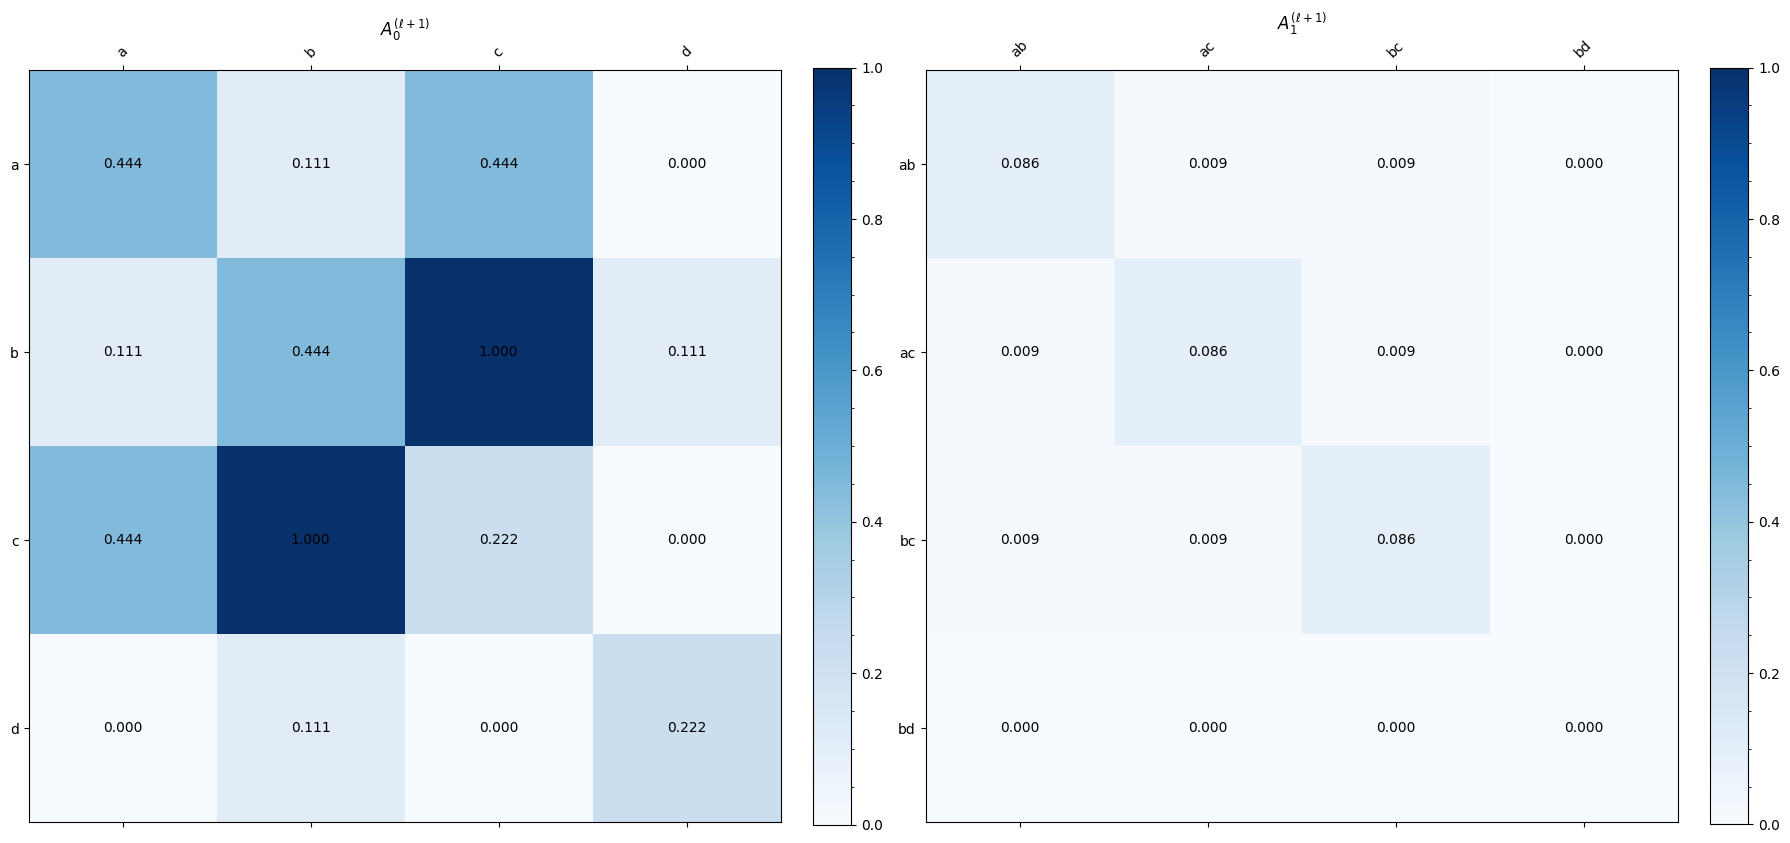

In [21]:
visualizeA(newSC3)

### Example 4- Simplicial complex defined using boundary matrices


Drawing simplicial complex...


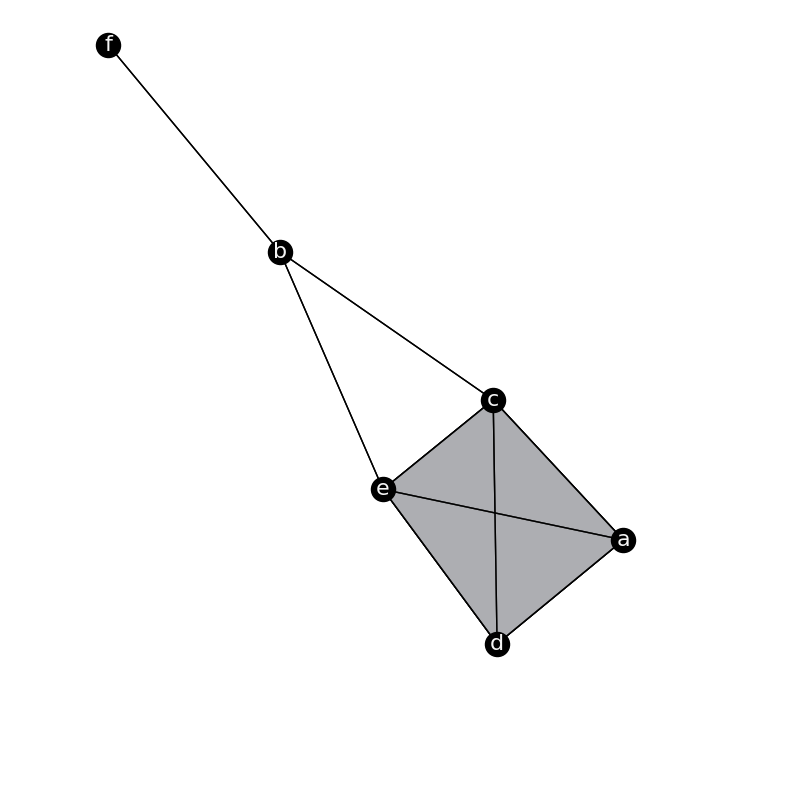

In [25]:
# boundary matrices that define SC4
B1 = np.array([[1,1,1,0,0,0,0,0,0],[0,0,0,1,1,1,0,0,0], [1,0,0,1,0,0,1,1,0], [0,1,0,0,0,0,1,0,1],[0,0,1,0,1,0,0,1,1],[0,0,0,0,0,1,0,0,0]])
B2 = np.array([[1,1,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[1,0,0,1],[0,1,0,1],[0,0,1,1]])
B3 = np.array([[1],[1],[1],[1]])
boundaries = (B1,B2,B3)


SC4 = complex.SComplex(boundaries)
drawComplex(SC4)

In [27]:
#Using the same S0 vertex cluster assignments as Example 3 (which is the same simplicial complex, initially defined by its simplex list)
S0 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]) # v x v'

(4, 4)
[[0.33333333 0.66666667 0.         0.        ]
 [0.33333333 0.         1.         0.33333333]
 [0.         0.66666667 1.         0.        ]
 [0.         0.         0.         0.33333333]]
(4, 1)
[[0.0952381]
 [0.0952381]
 [0.0952381]
 [0.       ]]
(array([[0.33333333, 0.66666667, 0.        , 0.        ],
       [0.33333333, 0.        , 1.        , 0.33333333],
       [0.        , 0.66666667, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333]]), array([[0.0952381],
       [0.0952381],
       [0.0952381],
       [0.       ]]))
Drawing simplicial complex...


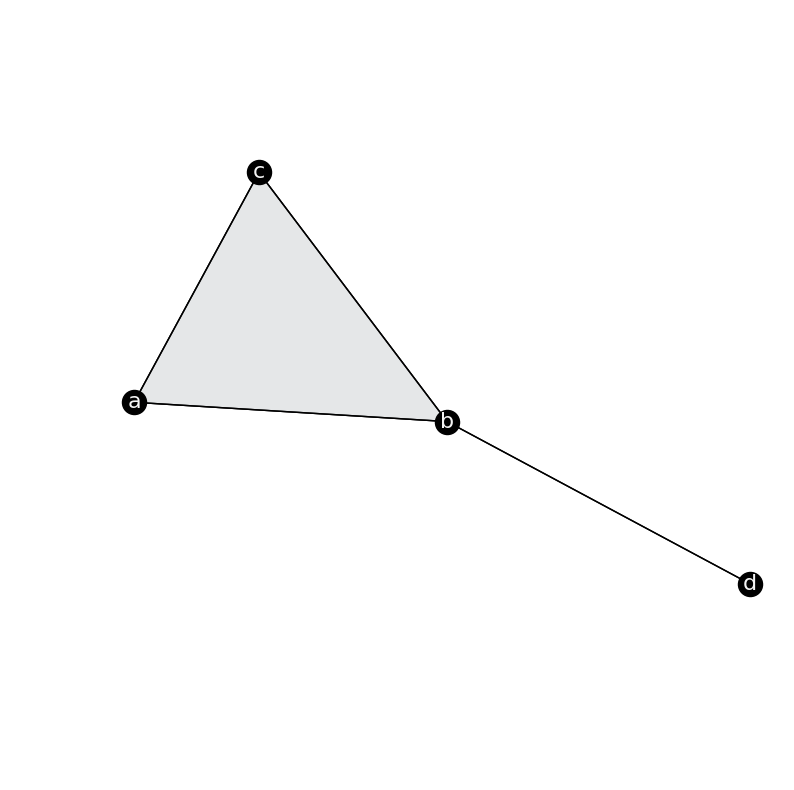

In [28]:
newSC4 = complex.pool_complex(SC4, S0)
drawComplex(newSC4)
